In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import sys
sys.path.insert(0, '/home/sahre/git_repositories/APDFT/prototyping/atomic_energies/')
import utils_qm as uqm
import bt_tools as bt

from scipy.optimize import curve_fit
from scipy.stats import linregress

In [2]:
data = pd.read_csv('/data/sahre/projects/atomic-energies/data/bonding_trends/pbe0_data/energies_homolytic.csv')
data_2 = data.loc[(data['Z1'] >= 6) & (data['Z1'] <= 9) & (data['Z2'] >= 6) & (data['Z2'] <= 9)].to_dict('list')
data_3 = data.loc[(data['Z1'] >= 14) & (data['Z2'] >= 14) & (data['Z1'] <= 17) & (data['Z2'] <= 17)].to_dict('list')
data_4 = data.loc[(data['Z1'] >= 32) & (data['Z2'] >= 32) & (data['Z1'] <= 35) & (data['Z2'] <= 35)].to_dict('list')
data_234 = data.loc[(data['Z1'] <= 9) & (data['Z2'] <= 9) | (data['Z1'] >= 14) & (data['Z2'] >= 14) & (data['Z1'] <= 17) & (data['Z2'] <= 17) | (data['Z1'] >= 32) & (data['Z2'] >= 32) & (data['Z1'] <= 35) & (data['Z2'] <= 35)].to_dict('list')

for d in [data_2, data_3, data_4, data_234]:
    d['unit'] = 630
    d['bfe type'] = 'homo'
    #d['nbfe'] = np.array(d['Z1'])*np.array(d['Z2'])-(np.array(d['Z1'])+np.array(d['Z2']))

### one optimized gamma for all rows

In [40]:
# non-linear fits

def non_linear_model(var, a, b, c):
    Z1, Z2 = var.T
#     gamma = 7/3
    ebfe = -a**2 - b**2*Z1*Z2 - c**2*(Z1**(gamma)+Z2**(gamma))
    return(ebfe)
gammas = []
MAEs= []
# do linear fits
b2_nl = bt.BDE_clean.fromdict(data_2)
b3_nl = bt.BDE_clean.fromdict(data_3)
b4_nl = bt.BDE_clean.fromdict(data_4)
for gamma in np.linspace(0.5, 4, 50):
    overall_mae = []
    
    p2 = [14.68820305, 24.89036038,  1.40953664]
    p3 = [19.81710356, 24.92342986,  1.22294599]
    p4 = [33.3052603 , 24.97639216,  0.90171214]
    
    for b, p0 in zip([b2_nl, b3_nl, b4_nl], [p2, p3, p4]):

        b.fit(non_linear_model, p0=p0)
        #print('MAE = ' + str((np.abs(b.bde-b.bde_fitted)).mean()))
        rounded_MAE = np.round((np.abs(b.bde-b.bde_fitted)).mean(),2)
        rounded_MAE_std = np.round(rounded_MAE/b.bde.std(), 2)
#         print(f'MAE = {rounded_MAE} ({rounded_MAE_std})')
        overall_mae.append((np.abs(b.bde-b.bde_fitted)).mean())
    MAE = (np.array(overall_mae)).mean()
    #print(f'gamma = {gamma}, MAE = {MAE}')
    
    gammas.append(gamma)
    MAEs.append(MAE)

/home/sahre/opt/miniconda3/envs/qm-tools/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [4]:
np.where(np.amin(MAEs) == MAEs)

(array([29]),)

In [5]:
gammas[29]

2.309183673469388

In [6]:
np.amin(MAEs)

1.8339116602291066

Text(0, 0.5, 'MAE (kcal/mol)')

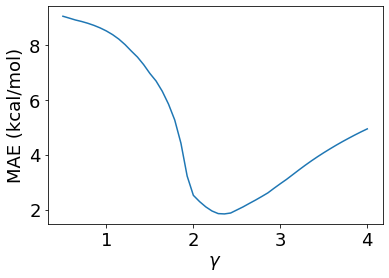

In [41]:
plt.rcParams['font.size'] = 18
plt.plot(gammas, MAEs, '-')
plt.xlabel(r'$\gamma$')
plt.ylabel('MAE (kcal/mol)')

# plt.savefig('/home/sahre/work/bonding_trends/figures/results/opt_gamma_close.png')

### optimize gamma for each row

In [8]:
# non-linear fits

def non_linear_model(var, a, b, c, gamma):
    Z1, Z2 = var.T
#     gamma = 7/3
    ebfe = -a**2 - b**2*Z1*Z2 - c**2*(Z1**(gamma)+Z2**(gamma))
    return(ebfe)

# do linear fits
b2_nl = bt.BDE_clean.fromdict(data_2)
b3_nl = bt.BDE_clean.fromdict(data_3)
b4_nl = bt.BDE_clean.fromdict(data_4)


p2 = [1, 1,  1, 1]
p3 = [19.81710356, 24.92342986,  1.22294599, 2.17]
p4 = [33.3052603 , 24.97639216,  0.90171214, 2.5]

for b, p0 in zip([b2_nl, b3_nl, b4_nl], [p2, p3, p4]):

    b.fit(non_linear_model, p0=p0)
    #print('MAE = ' + str((np.abs(b.bde-b.bde_fitted)).mean()))
    rounded_MAE = np.round((np.abs(b.bde-b.bde_fitted)).mean(),2)
    rounded_MAE_std = np.round(rounded_MAE/b.bde.std(), 2)
    print(rounded_MAE)
    print(b.params[0])

1.02
[15.07345978 24.89377596  1.27717297  2.40610777]
2.23
[16.55029921 24.91592806  1.59612864  2.17940637]
2.07
[39.30814049 24.98342978  0.56041203  2.56082421]


In [9]:
(1.02+2.23+2.07)/3

1.7733333333333334

In [18]:
# non-linear fits

def non_linear_model(var, a, b, c):
    Z1, Z2 = var.T
#     gamma = 7/3
    ebfe = -a**2 - b**2*Z1*Z2 - c**2*(Z1**(gamma)+Z2**(gamma))
    return(ebfe)

# do linear fits
b2_nl = bt.BDE_clean.fromdict(data_2)
b3_nl = bt.BDE_clean.fromdict(data_3)
b4_nl = bt.BDE_clean.fromdict(data_4)


p2 = [15, 24,  1.9]
p3 = [19.81710356, 24.92342986,  1.22294599]
p4 = [33.3052603 , 24.97639216,  0.90171214]

maes = []
for gamma in np.linspace(0.5, 4, 50):
    mae_row = []
    for b, p0 in zip([b2_nl, b3_nl, b4_nl], [p2, p3, p4]):

        b.fit(non_linear_model, p0=p0)
        #print('MAE = ' + str((np.abs(b.bde-b.bde_fitted)).mean()))
        rounded_MAE = np.round((np.abs(b.bde-b.bde_fitted)).mean(),2)
        rounded_MAE_std = np.round(rounded_MAE/b.bde.std(), 2)
#         print(rounded_MAE)
#         print(b.params[0])
        mae_row.append((np.abs(b.bde-b.bde_fitted)).mean())
    maes.append(mae_row)

/home/sahre/opt/miniconda3/envs/qm-tools/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


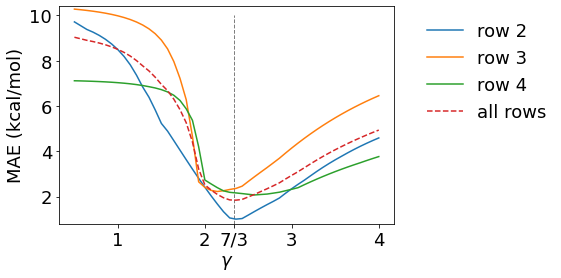

In [50]:
gamma_val = np.linspace(0.5, 4, 50)
fig, ax = plt.subplots(1,1)
ax.plot(gamma_val, np.array(maes)[:,0], label = 'row 2')
ax.plot(gamma_val, np.array(maes)[:,1], label = 'row 3')
ax.plot(gamma_val, np.array(maes)[:,2], label = 'row 4')

ax.plot(gammas, MAEs, '--', label = 'all rows')

ax.vlines(7/3, 0.8, 10, linestyles = '--', linewidth = 1, color= 'tab:gray')
ax.legend(frameon= False, bbox_to_anchor = (1.05,1))
ax.set_ylim([0.8, 10.4])
ax.set_xticks([1,2,7/3,3,4])
ax.set_xticklabels(['1','2','7/3','3','4'])
ax.set_xlabel(r'$\gamma$')
ax.set_ylabel('MAE (kcal/mol)')

plt.savefig('/home/sahre/work/bonding_trends/figures/results/opt_gamma.png', bbox_inches = 'tight', dpi=600)

In [ ]:
plt.rcParams['font.size'] = 18
plt.plot(gammas, MAEs, '-')
plt.xlabel(r'$\gamma$')
plt.ylabel('MAE (kcal/mol)')

In [ ]:
def gamma(Z, gamma_exp, a, c):
    return(c*np.power(Z, gamma_exp) + a)

In [ ]:
n = 4
if n == 2:
    Z = np.array([6,7,8,9])
    b = b2
elif n ==3:
    Z = np.array([14,15,16,17])
    b = b3

elif n == 4:
    Z = np.array([32,33,34,35])
    b = b4

out = linregress(np.power(Z, 7/3), b.linear_params[:4])
out_nl = curve_fit(gamma, Z, b.linear_params[:4], p0 = [4, out[1], out[0]], maxfev = 1000000)

In [ ]:
plt.plot(np.power(Z, 7/3), b.linear_params[:4], '-o')
plt.plot(np.power(Z, 7/3), out[0]*np.power(Z, 7/3)+out[1], '-o')
plt.plot(np.power(Z, 7/3), gamma(Z, out_nl[0][0], out_nl[0][1],  out_nl[0][2]), '-o')

In [ ]:
out_nl[0]

In [ ]:
n = 4
gamma_row = []
a_row = []
c_row = []
linear_params = []
for n in [2,3,4]:

    if n == 2:
        Z = np.array([6,7,8,9])
        b = b2
    elif n ==3:
        Z = np.array([14,15,16,17])
        b = b3

    elif n == 4:
        Z = np.array([32,33,34,35])
        b = b4

    out = linregress(np.power(Z, 7/3), b.linear_params[:4])
    out_nl = curve_fit(gamma, Z, b.linear_params[:4], p0 = [4, out[1], out[0]], maxfev = 1000000)
    
    gamma_row.append(out_nl[0][0])
    a_row.append(out[1])
    c_row.append(out[0])
    linear_params.extend(b.linear_params[:4])

In [ ]:
alphas = []
for b in [b2, b3, b4]:
    alphas.extend(b.linear_params[:4])
    
Zs = np.array( [6,7,8,9,14,15,16,17,32,33,34,35] )

In [ ]:
def gamma_rows(Z, gamma_exp, a2, a3, a4, c2, c3, c4):
    Z2 = Z[:4]
    Z3 = Z[4:8]
    Z4 = Z[8:]
    alpha2 = c2*np.power(Z2, gamma_exp) + a2
    alpha3 = c3*np.power(Z3, gamma_exp) + a3
    alpha4 = c4*np.power(Z4, gamma_exp) + a4
    alphas = []
    alphas.extend(alpha2)
    alphas.extend(alpha3)
    alphas.extend(alpha4)
    return(alphas)

In [ ]:
a2, a3, a4 = a_row
c2, c3, c4 = c_row

In [ ]:
out_row = curve_fit(gamma_rows, Zs,linear_params , p0 = [7/3, a2, a3, a4, c2, c3, c4], maxfev = 1000000)

In [ ]:
gamma_opt = out_row[0][0]

In [ ]:
gamma_opt

In [ ]:
plt.plot(alphas)
plt.plot(gamma_rows(Zs, *out_row[0]))

In [ ]:
bde = {'Li-X':[109.2, 180.4, 188, 193.5, 302.4, 430.3, 572.9],
      'BeH-X':[297.7, 342.3, 380.4, 503.1, 613.3, 739],
      'BH2-X':[431.6, 426.8, 583.3, 626, 705.4],
      'CH3-X':[359.2, 337.7, 370.2, 452],
      'NH2-X':[259.6, 253.5, 283.6],
      'OH-X':[195.2, 194.9],
      'F-X':[151.7]}

In [ ]:
bdes_paper = []
for frag in ['CH3-X', 'NH2-X', 'OH-X', 'F-X']:
    bdes_paper.extend(bde[frag])

In [ ]:
# bfe_paper = -np.array(bdes_paper)*0.00038
bfe_paper = -np.array([369.7, 347.3, 378.8, 459.2, 268.4, 261.2, 289.6, 212.5, 199.8, 155.3])*0.00038
data_2_paper = data_2.copy()
data_2_paper['bfe'] = bfe_paper

In [ ]:
b2_paper = bt.BDE_clean.fromdict(data_2_paper)

In [ ]:
b2_paper.linear_fit()

In [ ]:
Z = np.array([6,7,8,9])
plt.plot(Z**(7/3), b2_paper.linear_params[:4], '-o')

In [ ]:
out_paper = linregress(Z**(7/3), b2_paper.linear_params[:4])

In [ ]:
(Z**(7/3)*(out_paper[0])+out_paper[1]) -b2_paper.linear_params[:4]

In [ ]:
out_paper_Z = linregress(Z, b2_paper.linear_params[:4])

In [ ]:
(Z*(out_paper_Z[0])+out_paper_Z[1]) -b2_paper.linear_params[:4]

In [ ]:
curve_fit(gamma, Z,b2_paper.linear_params[:4] , p0 = [7/3, -1.9007544123454694,-82.88715824487872 ], maxfev = 1000000)